In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import cv2

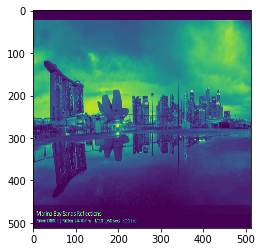

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02745098 0.02745098 0.02745098 ... 0.02745098 0.02745098 0.02745098]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]]


In [2]:
img = cv2.imread('Singapore.jpg')
img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(grey)
plt.show()
print(grey)

# Objectives
**out_data = grey x in_data + Bias + noises**  
where, out_data and in_data are 512 x 1 matrix  
       FC_NN is 512 x 512 matrix         
       Bias is 512 x 1 matrix
       
Assume that we are not sure about FC_NN and Bias matrixes but we have 10,000 dataset of in_data and out_data. 

**Let auto discover these FC_NN and Bias matrixes using Adam Optimizer from TensorFlow**

In [3]:
in_data = []
out_data = []
dataset_size = 10000
FC_NN = grey
Bias_NN = np.random.rand(512,1)-0.5
tmp = 0
for i in range(dataset_size):
    in_data.append(np.random.rand(512,1))
for i in range(dataset_size):        
    out_data.append((np.dot(FC_NN,in_data[i])/512) - Bias_NN - (np.random.rand(512,1)-0.5)*0.001)
np_in_data = np.array(in_data)
np_out_data = np.array(out_data)

**Let look at np_in and np_out**

In [4]:
print('np_in_data[0,0:10] : {}'.format(np_in_data[0,0:10].reshape((1,10))))
print('np_out_data[0,0:10] : {}'.format(np_out_data[0,0:10].reshape((1,10))))

np_in_data[0,0:10] : [[0.55337741 0.76897284 0.02662595 0.03308794 0.89156647 0.61977046
  0.249791   0.08329602 0.40452805 0.18963824]]
np_out_data[0,0:10] : [[-0.02612403 -0.11323767  0.29617894  0.047158    0.29639577 -0.10315047
  -0.25614718  0.31753459 -0.12380411 -0.41571162]]


In [5]:
def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

def train_test_split(x,y,train_ratio):
    train_size = int(y.shape[0]*train_ratio)
    x_train = x[0:train_size]
    y_train = y[0:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    return x_train, y_train, x_test, y_test


# Setting up the model in TensorFlow

In [6]:
learning_rate = 0.001
str_save_name = 'model_4.ckpt'

# Create placeholder
mt = tf.Variable(tf.random_normal([512, 512], stddev=0.35),
                      name="weights")
Bias = tf.Variable(tf.random_normal([512, 1], stddev=0.35),
                      name="Bias")

# Build the model
x = tf.placeholder(tf.float32, shape=[512, 1])
y = tf.placeholder(tf.float32, shape=[512, 1])
pred = (tf.matmul(mt, x)/512) - Bias

# Train the model
loss = tf.reduce_sum(tf.pow(pred-y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# # Experiment Dropout implementation (development in progress)
# dropout = tf.placeholder(tf.float32, shape=[512, 512])
# pred_train = ((tf.matmul(tf.multiply(mt,dropout), x)/512) - np.ones((512,1))*0.25)*100 - Bias
# loss_train = tf.reduce_sum(tf.pow(pred_train-y, 2))
# optimizer_dropout = tf.train.AdamOptimizer(learning_rate).minimize(loss_train)

Instructions for updating:
Colocations handled automatically by placer.


**Save the model and weight to model_2.ckpt**

Instructions for updating:
Use `tf.global_variables_initializer` instead.
initial model file created!
Predicted Image before training


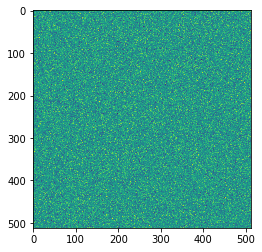

In [7]:
saver = tf.train.Saver()
init_op = tf.initialize_all_variables()
with tf.Session() as sess:    
    sess.run(init_op)     
    save_path = saver.save(sess, str_save_name)
    print("initial model file created!")
    print("Predicted Image before training")
    FC_NN_pred = sess.run(mt)            
    plt.imshow(FC_NN_pred)
    plt.show()


# Train the model
**Reload the model and train the model. The model will be saved in every 10 Epochs. In this way, we can stop training at any time and can continue from the last saved one.**

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model_4.ckpt
Model Saved!
Predicted Image after epoch no. 0


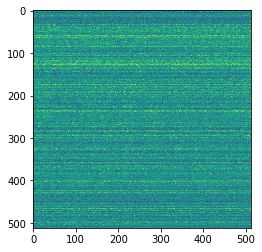

epoch: 0002 /100 ,avg train cost= 0.011155 ,avg test cost= 0.011902 ,abs_err[idx0]: 1.790851 ,cyc time: 12.9 s
epoch: 0004 /100 ,avg train cost= 0.003146 ,avg test cost= 0.003542 ,abs_err[idx0]: 0.474446 ,cyc time: 13.0 s
epoch: 0006 /100 ,avg train cost= 0.000604 ,avg test cost= 0.000708 ,abs_err[idx0]: 0.257025 ,cyc time: 13.0 s
epoch: 0008 /100 ,avg train cost= 0.000203 ,avg test cost= 0.000218 ,abs_err[idx0]: 0.225654 ,cyc time: 12.8 s
Model Saved!
Predicted Image after epoch no. 8


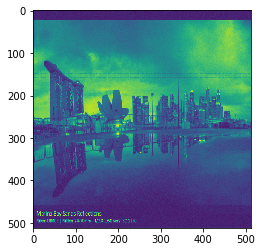

epoch: 0010 /100 ,avg train cost= 0.000148 ,avg test cost= 0.000154 ,abs_err[idx0]: 0.213071 ,cyc time: 15.5 s
epoch: 0012 /100 ,avg train cost= 0.000139 ,avg test cost= 0.000145 ,abs_err[idx0]: 0.213999 ,cyc time: 16.4 s
epoch: 0014 /100 ,avg train cost= 0.000150 ,avg test cost= 0.000156 ,abs_err[idx0]: 0.229171 ,cyc time: 15.8 s
epoch: 0016 /100 ,avg train cost= 0.000152 ,avg test cost= 0.000157 ,abs_err[idx0]: 0.215168 ,cyc time: 15.9 s
Model Saved!
Predicted Image after epoch no. 16


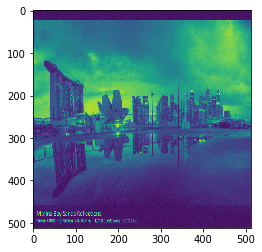

epoch: 0018 /100 ,avg train cost= 0.000151 ,avg test cost= 0.000157 ,abs_err[idx0]: 0.222108 ,cyc time: 15.8 s
epoch: 0020 /100 ,avg train cost= 0.000152 ,avg test cost= 0.000157 ,abs_err[idx0]: 0.238122 ,cyc time: 15.9 s
epoch: 0022 /100 ,avg train cost= 0.000147 ,avg test cost= 0.000152 ,abs_err[idx0]: 0.224277 ,cyc time: 15.8 s
epoch: 0024 /100 ,avg train cost= 0.000139 ,avg test cost= 0.000144 ,abs_err[idx0]: 0.221189 ,cyc time: 15.7 s
Model Saved!
Predicted Image after epoch no. 24


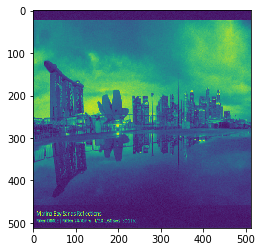

epoch: 0026 /100 ,avg train cost= 0.000145 ,avg test cost= 0.000150 ,abs_err[idx0]: 0.218009 ,cyc time: 15.9 s
epoch: 0028 /100 ,avg train cost= 0.000147 ,avg test cost= 0.000152 ,abs_err[idx0]: 0.231291 ,cyc time: 21.0 s
epoch: 0030 /100 ,avg train cost= 0.000154 ,avg test cost= 0.000159 ,abs_err[idx0]: 0.240842 ,cyc time: 17.4 s
epoch: 0032 /100 ,avg train cost= 0.000138 ,avg test cost= 0.000143 ,abs_err[idx0]: 0.206927 ,cyc time: 16.1 s
Model Saved!
Predicted Image after epoch no. 32


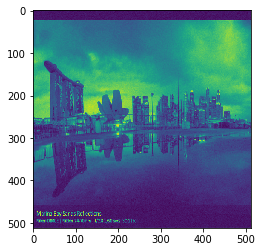

epoch: 0034 /100 ,avg train cost= 0.000133 ,avg test cost= 0.000139 ,abs_err[idx0]: 0.210639 ,cyc time: 15.7 s
epoch: 0036 /100 ,avg train cost= 0.000139 ,avg test cost= 0.000144 ,abs_err[idx0]: 0.210624 ,cyc time: 16.4 s
epoch: 0038 /100 ,avg train cost= 0.000140 ,avg test cost= 0.000145 ,abs_err[idx0]: 0.214382 ,cyc time: 16.4 s
epoch: 0040 /100 ,avg train cost= 0.000142 ,avg test cost= 0.000147 ,abs_err[idx0]: 0.206670 ,cyc time: 16.5 s
Model Saved!
Predicted Image after epoch no. 40


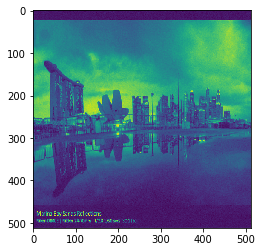

epoch: 0042 /100 ,avg train cost= 0.000136 ,avg test cost= 0.000142 ,abs_err[idx0]: 0.208862 ,cyc time: 16.6 s
epoch: 0044 /100 ,avg train cost= 0.000139 ,avg test cost= 0.000144 ,abs_err[idx0]: 0.206994 ,cyc time: 16.1 s
epoch: 0046 /100 ,avg train cost= 0.000155 ,avg test cost= 0.000161 ,abs_err[idx0]: 0.232919 ,cyc time: 16.4 s
epoch: 0048 /100 ,avg train cost= 0.000140 ,avg test cost= 0.000146 ,abs_err[idx0]: 0.217934 ,cyc time: 16.7 s
Model Saved!
Predicted Image after epoch no. 48


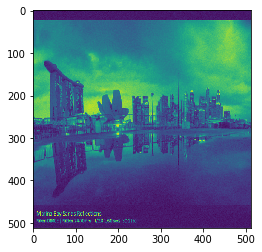

epoch: 0050 /100 ,avg train cost= 0.000138 ,avg test cost= 0.000144 ,abs_err[idx0]: 0.216345 ,cyc time: 16.0 s
epoch: 0052 /100 ,avg train cost= 0.000149 ,avg test cost= 0.000154 ,abs_err[idx0]: 0.220578 ,cyc time: 16.3 s
epoch: 0054 /100 ,avg train cost= 0.000132 ,avg test cost= 0.000137 ,abs_err[idx0]: 0.211609 ,cyc time: 16.6 s
epoch: 0056 /100 ,avg train cost= 0.000135 ,avg test cost= 0.000141 ,abs_err[idx0]: 0.212504 ,cyc time: 15.2 s
Model Saved!
Predicted Image after epoch no. 56


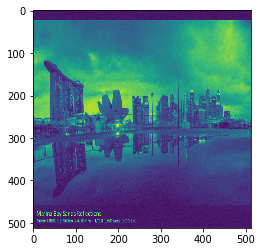

epoch: 0058 /100 ,avg train cost= 0.000146 ,avg test cost= 0.000152 ,abs_err[idx0]: 0.223626 ,cyc time: 15.6 s
epoch: 0060 /100 ,avg train cost= 0.000151 ,avg test cost= 0.000156 ,abs_err[idx0]: 0.217380 ,cyc time: 15.7 s
epoch: 0062 /100 ,avg train cost= 0.000131 ,avg test cost= 0.000136 ,abs_err[idx0]: 0.216396 ,cyc time: 16.0 s
epoch: 0064 /100 ,avg train cost= 0.000142 ,avg test cost= 0.000147 ,abs_err[idx0]: 0.221819 ,cyc time: 15.4 s
Model Saved!
Predicted Image after epoch no. 64


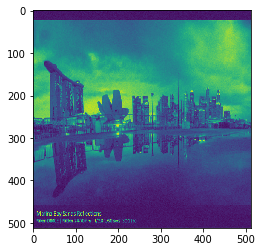

epoch: 0066 /100 ,avg train cost= 0.000138 ,avg test cost= 0.000144 ,abs_err[idx0]: 0.214318 ,cyc time: 16.4 s
epoch: 0068 /100 ,avg train cost= 0.000138 ,avg test cost= 0.000143 ,abs_err[idx0]: 0.218460 ,cyc time: 16.5 s
epoch: 0070 /100 ,avg train cost= 0.000129 ,avg test cost= 0.000134 ,abs_err[idx0]: 0.202917 ,cyc time: 16.5 s
epoch: 0072 /100 ,avg train cost= 0.000162 ,avg test cost= 0.000168 ,abs_err[idx0]: 0.220476 ,cyc time: 15.9 s
Model Saved!
Predicted Image after epoch no. 72


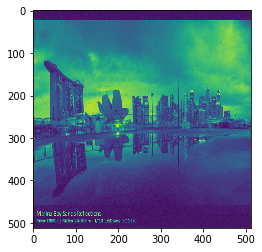

epoch: 0074 /100 ,avg train cost= 0.000142 ,avg test cost= 0.000148 ,abs_err[idx0]: 0.210613 ,cyc time: 16.4 s
epoch: 0076 /100 ,avg train cost= 0.000151 ,avg test cost= 0.000156 ,abs_err[idx0]: 0.227412 ,cyc time: 16.4 s
epoch: 0078 /100 ,avg train cost= 0.000144 ,avg test cost= 0.000149 ,abs_err[idx0]: 0.212157 ,cyc time: 16.4 s
epoch: 0080 /100 ,avg train cost= 0.000147 ,avg test cost= 0.000152 ,abs_err[idx0]: 0.211001 ,cyc time: 16.4 s
Model Saved!
Predicted Image after epoch no. 80


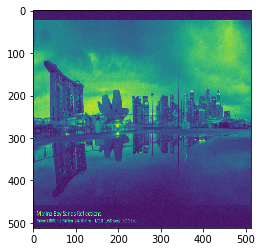

epoch: 0082 /100 ,avg train cost= 0.000145 ,avg test cost= 0.000150 ,abs_err[idx0]: 0.220709 ,cyc time: 16.2 s
epoch: 0084 /100 ,avg train cost= 0.000148 ,avg test cost= 0.000153 ,abs_err[idx0]: 0.214927 ,cyc time: 16.2 s
epoch: 0086 /100 ,avg train cost= 0.000149 ,avg test cost= 0.000154 ,abs_err[idx0]: 0.228529 ,cyc time: 15.9 s
epoch: 0088 /100 ,avg train cost= 0.000141 ,avg test cost= 0.000146 ,abs_err[idx0]: 0.235775 ,cyc time: 15.7 s
Model Saved!
Predicted Image after epoch no. 88


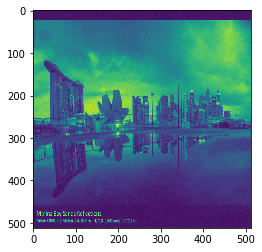

epoch: 0090 /100 ,avg train cost= 0.000140 ,avg test cost= 0.000145 ,abs_err[idx0]: 0.206714 ,cyc time: 15.9 s
epoch: 0092 /100 ,avg train cost= 0.000147 ,avg test cost= 0.000152 ,abs_err[idx0]: 0.221690 ,cyc time: 16.2 s
epoch: 0094 /100 ,avg train cost= 0.000144 ,avg test cost= 0.000149 ,abs_err[idx0]: 0.218046 ,cyc time: 16.0 s
epoch: 0096 /100 ,avg train cost= 0.000140 ,avg test cost= 0.000145 ,abs_err[idx0]: 0.217679 ,cyc time: 15.7 s
Model Saved!
Predicted Image after epoch no. 96


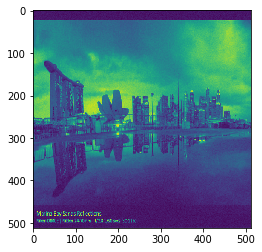

epoch: 0098 /100 ,avg train cost= 0.000137 ,avg test cost= 0.000142 ,abs_err[idx0]: 0.216118 ,cyc time: 15.9 s
epoch: 0100 /100 ,avg train cost= 0.000159 ,avg test cost= 0.000164 ,abs_err[idx0]: 0.233030 ,cyc time: 15.8 s
Optimization Finished!
Model Saved!
abs_err of idx 0: [0.23303093]


In [8]:
# parameters
train_ratio = 0.8
training_epochs = 100
dropout_rate = 0
display_step = 2
save_step = 8

# Train and Test Split
np_in_data_train, np_out_data_train, np_in_data_test, np_out_data_test = train_test_split(np_in_data, 
                                                                                          np_out_data, 
                                                                                          train_ratio = train_ratio)

# Start training
with tf.Session() as sess:    
    
    # Load the model
    saver.restore(sess, str_save_name)    

    for epoch in range(training_epochs):               
        start = time.time()        
        # randomize train dataset
        np_in_data_train, np_out_data_train = randomize(np_in_data_train, np_out_data_train)
        
        # Train the model for one epoch
        for n in range(np_out_data_train.shape[0]):      
            if(n%100==0):
                dropout_1 = (np.random.rand(512,512)>dropout_rate)*1.0        
            sess.run(optimizer,feed_dict={x:np_in_data_train[n],y:np_out_data_train[n]})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            
            # get total cost of train set
            c = 0;
            for n in range(np_out_data_train.shape[0]):
                c = c + sess.run(loss,feed_dict={x:np_in_data_train[n],y:np_out_data_train[n]})
            c = c/np_out_data_train.shape[0]
            
            # get total cost of test set
            c_t = 0;
            for n in range(np_out_data_test.shape[0]):
                c_t = c_t + sess.run(loss,feed_dict={x:np_in_data_test[n],y:np_out_data_test[n]})
            c_t = c_t/np_out_data_test.shape[0]
            
            # Show Absolute  Error
            predict = sess.run(pred,feed_dict={x:np_in_data_test[0]})
            
            # Display the message
            print("epoch:", '%04d' % (epoch+1), '/%d' % (training_epochs), ",avg train cost=", "{:.8}".format(str(c)),
                  ",avg test cost=", "{:.8}".format(str(c_t)), 
                  ",abs_err[idx0]:", "{:.8}".format(str(sum(sum(abs(predict-np_out_data_test[0]))))),
                  ",cyc time:", "{:.4}".format(str(time.time() - start)), "s")

        if (epoch) % save_step == 0:            
            
            # Save the model
            save_path = saver.save(sess, str_save_name)
            print("Model Saved!")
            print("Predicted Image after epoch no. {}".format(epoch))
            FC_NN_pred = sess.run(mt)            
            plt.imshow(FC_NN_pred)
            plt.show()

            
    print("Optimization Finished!")
    predict = sess.run(pred,feed_dict={x:np_in_data_test[0]})
    save_path = saver.save(sess, str_save_name)
    print("Model Saved!")
    print("abs_err of idx 0: {}".format(sum(abs(predict-np_out_data_test[0]))))

    

# Check the result
**Print Predicted FC_NN matrix vs actual one**  
**Print Predicted Bias matrix vs actual one**  
**You will find that they are actually very close**  

In [9]:
with tf.Session() as sess: 
    saver.restore(sess, str_save_name)
    print(sess.run(mt)[0:2][0:2])
    print(FC_NN[0:2][0:2])
    print(sess.run(Bias)[0:10].reshape((1,10)))
    print(Bias_NN[0:10].reshape((1,10)))
    print('predict[0,0:10] : {}'.format(predict[0:10].reshape((1,10))))
    print('np_out_data[0,0:10] : {}'.format(np_out_data[0,0:10].reshape((1,10))))

INFO:tensorflow:Restoring parameters from model_4.ckpt
[[-0.00572698 -0.01417115  0.00454427 ... -0.00912636 -0.02365083
  -0.01295477]
 [-0.01674469 -0.02340008 -0.00725563 ... -0.01559674 -0.00167475
   0.00604693]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.02627404  0.11213379 -0.29668987 -0.04786608 -0.29657307  0.10298976
   0.25583133 -0.31821498  0.12393564  0.41493142]]
[[ 0.02569835  0.11315217 -0.29615658 -0.04714065 -0.29668569  0.10324053
   0.25575254 -0.31796894  0.12396127  0.41575262]]
predict[0,0:10] : [[-0.02616147 -0.11248491  0.29720762  0.04699492  0.29619598 -0.10349108
  -0.25614843  0.3180319  -0.12401899 -0.41543302]]
np_out_data[0,0:10] : [[-0.02612403 -0.11323767  0.29617894  0.047158    0.29639577 -0.10315047
  -0.25614718  0.31753459 -0.12380411 -0.41571162]]
